# Access Data from Artemis

In [4]:
#typical ML imports (from NN example ipynb)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
#from utils import * 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

plt.rcParams['savefig.dpi'] = 400
plt.rcParams['font.size'] = 13
plt.rcParams["legend.frameon"] = False

In [32]:
#look at Val's pre SOCAT py file

path_SST = '/local/data/artemis/observations/NOAA_OI_SSTv2/processed/sst_1x1_mon_NOAAOIv2_198112-201908.nc'

path_SSS = '/local/data/artemis/observations/EN422_salinity/processed/sss_1x1_mon_EN422_197901-202012.nc'

path_xCO2 = #'https://gml.noaa.gov/ccgg/mbl/'
#make sure includes lat lon variations (via pressure field) and water vapor correction
# using pressure:
path_pres = '/local/data/artemis/observations/ERA5_MSLP/ERA5_MSLP_1x1_1979-2021.nc' #make sure in atmospheres
#expect 300 to 450 depending on year

path_chlA = '/local/data/artemis/observations/GlobColour/processed/globcolour-L3m-GSM_chl_1x1_monthly_198201-202112.nc'

path_MLD = '/local/data/artemis/observations/MLD_deBoyerMontegut/val_processed/mld_deboyer_1x1_clim_198201-201712.nc'
#LOOK AT Val's code, should be able to just add additional years, see if jan 2017 same as jan 2000
path_pCO2 = '/local/data/artemis/observations/SOCAT/processed/SOCATv2022_pCO2_gridded_monthly.nc'
#IF need to add CESM, /local/data/artemis/observations/CESM_hindcast/processed 

#ds1 = xr.open_dataset(‘/data/artemis/workspace/vbennington/GlobColour/originals/L3m_GLOB_CHL1_199801-202012.nc’)
#ds2 = xr.open_dataset(‘/data/artemis/workspace/afay/GlobColour/originals/L3m_GLOB_CHL1_202001-202112.nc’)

In [ ]:
df = ldeo_res_flux
lon = df.lon
print(lon.shape)
lon2 = np.where(lon < 0, lon+360, lon)
# # print(lon2)
df.coords['lon'] = (lon2)
df = df.sortby(df.lon)
# # print(df)
df[300,:,:].plot()
# # print(df.lon)
ldeo_res_flux360 = df
print(ldeo_res_flux360.dims)
print(ldeo_res_flux360.shape)
del df

In [33]:
ds_pCO2 = xr.open_dataset(path_pCO2)
ds_SST = xr.open_dataset(path_SST)
ds_chlA = xr.open_dataset(path_chlA)

In [34]:
print(ds_chlA) #NOTE WILL NEED TO STANDARDIZE LONGITUDE, and will need to standardize time
# check Val's scripts for time and lon conversions
# define a function for switching longitudes, see Amanda's example

<xarray.Dataset>
Dimensions:  (time: 480, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-15 1982-02-15 ... 2021-12-15
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Data variables:
    chl      (time, lat, lon) float32 ...


In [35]:
print(ds_pCO2)

<xarray.Dataset>
Dimensions:        (time: 516, ylat: 180, xlon: 360)
Coordinates:
  * time           (time) datetime64[ns] 1979-01-16T12:00:00 ... 2021-12-16T1...
  * ylat           (ylat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * xlon           (xlon) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Data variables:
    pCO2           (time, ylat, xlon) float64 ...
    pCO2_unweight  (time, ylat, xlon) float64 ...
    socat_mask     (time, ylat, xlon) float64 ...
    sst            (time, ylat, xlon) float32 ...
    sst_unweight   (time, ylat, xlon) float32 ...
    mslp           (time, ylat, xlon) float64 ...
    fco2           (time, ylat, xlon) float32 ...
    fco2_unweight  (time, ylat, xlon) float32 ...
Attributes:
    created:  Amanda Fay July 5, 2022 using SOCAT_processing.ipynb


(array([     0.,      0.,      0.,      0.,      0., 343267.,      0.,
             0.,      0.,      0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

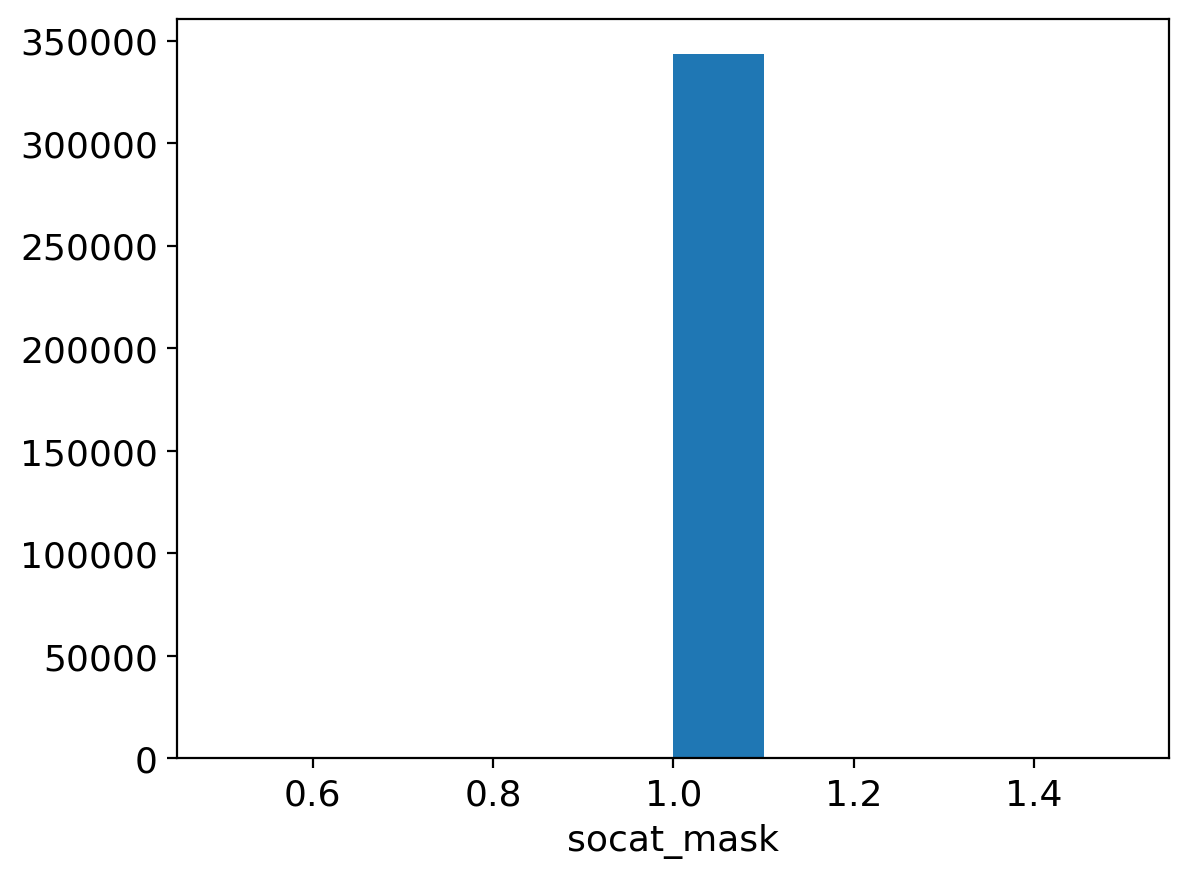

In [41]:
ds_pCO2.socat_mask.plot()

In [45]:
dickson = pd.read_csv('/data/artemis/workspace/vbennington/Dickson_atmos/Dickson_monthly_pco2.csv')

In [46]:
dickson.head() #only varies with time, not lat and lon

,Year,Month,pco2 atm with pressure only,pco2 atm with press and water vapor corr,Unnamed: 4,xco2 from NOAA ESRL,Unnamed: 6
0,1958.0,1.0,313.201553,306.187691,NaN,314.191,NaN
1,1958.0,2.0,313.399152,306.292497,NaN,314.238,pre 1980 is a mean of South Pole and Mauna Loa...
2,1958.0,3.0,313.615746,306.477088,NaN,314.272,NaN
3,1958.0,4.0,314.954748,307.786391,NaN,315.485,NaN
4,1958.0,5.0,314.661538,307.540725,NaN,315.369,NaN


In [47]:
# take time series of xCO2 and multiply by time and space-varying pressure